In [1]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord 
import numpy as np
from pathlib import Path
from astropy.table import Column
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ROOT_PATH = Path("..") # necessary since we are in the `notebooks/` sub-folder

In [3]:
table = Table.read(ROOT_PATH / "input_luis.txt", format="ascii")
table.colnames
table

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Put data in form expected by scikit-learn (and without col1 and col2 and -0)

In [4]:
table.remove_columns(['col1', 'col2'])

In [5]:
table
table.colnames

['col3',
 'col4',
 'col5',
 'col6',
 'col7',
 'col8',
 'col9',
 'col10',
 'col11',
 'col12',
 'col13',
 'col14',
 'col15',
 'col16',
 'col17',
 'col18',
 'col19',
 'col20',
 'col21',
 'col22',
 'col23']

In [6]:
X = np.array(list(zip(table['col3'],
 table['col4'],
 table['col5'],
 table['col6'],
 table['col7'],
 table['col8'],
 table['col9'],
 table['col10'],
 table['col11'],
 table['col12'],
 table['col13'],
 table['col14'],
 table['col15'],
 table['col16'],
 table['col17'],
 table['col18'],
 table['col19'],
 table['col20'],
 table['col21'],
 table['col22'],
 table['col23'])))

In [7]:
X.shape

(102400, 21)

In [8]:
# Standarized the data
X_stand = StandardScaler().fit_transform(X)

In [9]:
# Creating the PCA 
pca = PCA(n_components=10)
pca.fit(X_stand)

X_pca = pca.transform(X_stand)

In [10]:
#porcentages
print("Porcentage:", pca.explained_variance_ratio_)
print("Singular Value:", pca.singular_values_)
print("Component:", pca.components_) # eigevectors
print("Sorted components:", pca.explained_variance_) # eigenvalues

Porcentage: [0.65166974 0.12514569 0.04619634 0.0406196  0.03077319 0.02547329
 0.02411236 0.01465885 0.01038174 0.00761494]
Singular Value: [1183.78655328  518.76130945  315.18344201  295.54761039  257.24439186
  234.04650184  227.70864557  177.54546065  149.41519363  127.96545748]
Component: [[-0.24234721 -0.2115139   0.23883225 -0.24358502  0.20722148 -0.24444137
  -0.24221809  0.21046673 -0.22110725 -0.21873912 -0.10151185 -0.21187443
  -0.17037576  0.20587471 -0.23555047  0.20750643  0.21778404  0.1898487
   0.23171404  0.24009787  0.24041699]
 [-0.18503819  0.36911713  0.16736781 -0.06741568 -0.36993492  0.0370564
   0.09063404  0.2064792   0.32889827 -0.2151163  -0.11223449  0.3523438
  -0.15576893 -0.37316928 -0.06039842  0.21005933  0.20194951  0.06335261
   0.14175771  0.19390383 -0.05392815]
 [ 0.01401792  0.02742864 -0.11497117 -0.0317454  -0.15481025 -0.26329256
  -0.20847733 -0.11357455  0.12647948  0.08750001  0.76253638 -0.04623973
   0.23746728 -0.15637336 -0.1542259  

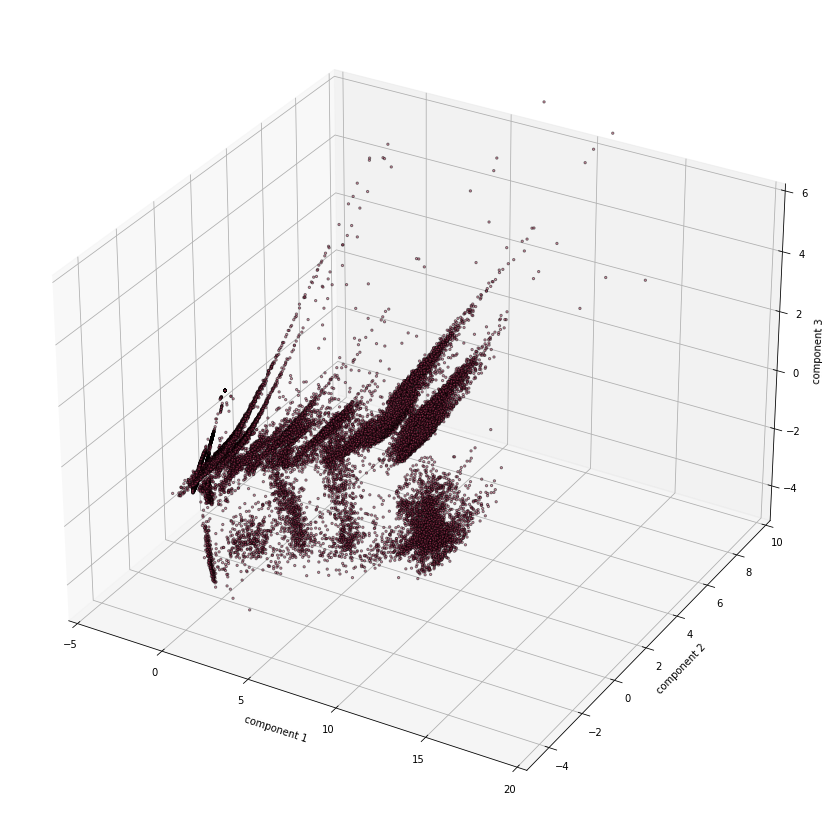

In [11]:
import seaborn as sns
from matplotlib import animation

fig, ax = plt.subplots(figsize=(15, 15)), plt.axes(projection='3d')

ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
            c=sns.xkcd_rgb['dark pink'], s=5, edgecolor='black', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
ax.set(xlim=[-5.0, 20.0], ylim=[-5.0, 10.0], zlim=[-5.0, 6.0])

#ax.set_aspect("equal")
plt.savefig("PC1_PC2_input_luis.pdf")

In [13]:
from astropy.io import fits
#fits.writeto("pca_results_input_luis.fits", X_pca)
hdu = fits.PrimaryHDU(X_pca)
hdu.header
hdu.header['PCA'] = 'Python Scikit-Learn'
hdul = fits.HDUList([hdu])
hdul.writeto(ROOT_PATH / 'pca_results_input_luis.fits', overwrite=True)

In [14]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   10                                                  
NAXIS2  =               102400                                                  
EXTEND  =                    T                                                  
PCA     = 'Python Scikit-Learn'                                                 

Save the eigenvectors and porcentages

In [15]:
from astropy.table import join

porc = Table(pca.explained_variance_ratio_) # porcantage ratio
eing = Table(pca.components_) # Eiginvectors

eing

col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.24234720813320146,-0.21151390447736587,0.23883224670391803,-0.24358502474392146,0.20722147898568036,-0.24444137035736355,-0.24221808656088828,0.2104667265692908,-0.2211072529561456,-0.21873912477945412,-0.10151184653622779,-0.21187443045834067,-0.17037575543766334,0.20587471248936487,-0.23555047449697827,0.2075064339019459,0.21778404495028306,0.18984869594293916,0.23171404449582217,0.24009786832219643,0.24041698804056436
-0.18503819297195542,0.3691171346898061,0.16736781225050795,-0.06741568032329635,-0.36993491721412214,0.03705639769984192,0.0906340403622605,0.20647920005383638,0.32889827042270775,-0.21511630013853061,-0.11223449017110311,0.3523437962591652,-0.15576893361998384,-0.37316928302301217,-0.06039841806081937,0.2100593291482962,0.20194951447799342,0.06335260921115432,0.1417577142171284,0.1939038294222421,-0.053928145921804095
0.014017924837586798,0.027428642688022663,-0.11497117149962986,-0.031745396791450914,-0.15481025217907673,-0.2632925639885475,-0.20847733212141822,-0.11357454598362268,0.12647948452871563,0.08750000764914208,0.7625363794253734,-0.04623973461758745,0.2374672820234689,-0.1563733561924136,-0.1542258995524986,0.05542029839700114,0.14030524008715642,0.29871485298294104,0.04337639635664439,-0.03822877499534908,0.0892258911537047
0.18029030248710853,0.07126629824138993,-0.10977464981720653,0.073652699254243,-0.024044917550080497,-0.02476799901401258,-0.06523143672143528,-0.39052400899832784,0.015167712827860948,0.3364790983555649,-0.4252974002143853,0.09776308795339181,-0.15718278694104545,-0.02392414429969239,-0.27861444927196755,0.10003287470189158,0.19761630438375785,0.5307491010757597,-0.09145713394371217,-0.15927420041595863,0.125343368099788
0.02235108850063596,-0.11291443659478427,-0.10844376869931299,0.27735285690288325,0.1370124128154711,0.2775296794395017,0.33539871087493034,0.07349331403392473,-0.09939698490143571,-0.11164832367148618,0.3019581756122786,-0.09427238455787447,-0.3928156042935994,0.14000224954523793,-0.011608282810648407,0.32880464057215314,0.29420780083085846,0.1768350922803509,-0.12025999743688603,0.0014138849677902314,-0.3840845793868339
-0.0024047927398198215,-0.06580762439005108,-0.18116091835344741,0.16867694697361874,0.006445605359338714,0.030861414745322932,0.07165432571093011,0.27976305246332384,0.005954339847591371,-0.28089311878863926,-0.2697926917772752,-0.09478253086532143,0.7311249690832483,0.007611039408737039,-0.10657367346345427,0.11557741036362564,0.10150686874760194,0.2663656848438786,-0.13173342526020626,0.005247289818724527,-0.17701749409045556
-0.17255725019042592,-0.018260157718706427,0.22648356583193158,-0.061631540785879464,0.060652690825731416,0.15085556422625696,0.16623630739551076,-0.41015882369444184,-0.059011549106952166,0.34752524207411234,-0.012099788399152014,0.003568780999719108,0.3777355605466499,0.06095420782204119,0.16601646019706162,0.3096283441216024,0.2679336151556716,-0.19265365492385417,0.37638760696614715,0.18459779609603622,-0.11662982233723604
-0.1505337836133907,-0.0283201011990281,-0.34390781250767566,-0.013496805790520573,-0.07006318212116494,-0.21779843989280057,-0.176562550154703,-0.10659719997278565,0.04671515012363529,0.06758919702155827,-0.08083492030883653,-0.07963835397379743,-0.04882070309587606,-0.07105635152521364,0.02205031755422171,0.6242449214133557,-0.17725079706944538,-0.3167734221462175,-0.4251016234316578,0.1714298206614797,0.06411019183498748
-0.3431826124975314,0.07726017634130389,0.11550531780223537,-0.2531945154907145,0.10015774348038907,0.24910048951652258,0.19965347475476056,-0.06588837281819296,-0.07502263878547966,0.11206667410071648,0.1288612982100054,0.16305008347046882,0.06734100877868375,0.10053013202322279,-0.005670799

In [16]:
asciifile = "eigenvectors.dat" 
eing.write(ROOT_PATH / asciifile, format="ascii.commented_header")
